# Mooring Plotly Multi - Choose multiple ADCP datastreams

In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [25]:
import pandas as pd
import xarray as xr
import datetime
import EcoFOCIpy.io.erddap as erddap
import numpy as np

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

In [22]:
url = "http://akutan.pmel.noaa.gov:8080/erddap"
adcp_01_data = xr.load_dataset(url+'/griddap/ADCP_Mooring_21bsp4a_final')
adcp_02_data = xr.load_dataset(url+'/griddap/ADCP_Mooring_22bsp4a_final')

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc1' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc2' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc3' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/conventions.py:204: SerializationWarning: variable 'agc4' has multiple fill values {1e+35, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/Users/bell/mambaforge/envs/

/Users/bell/mambaforge/envs/p312/lib/python3.12/site-packages/xarray/computation/apply_ufunc.py:818: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


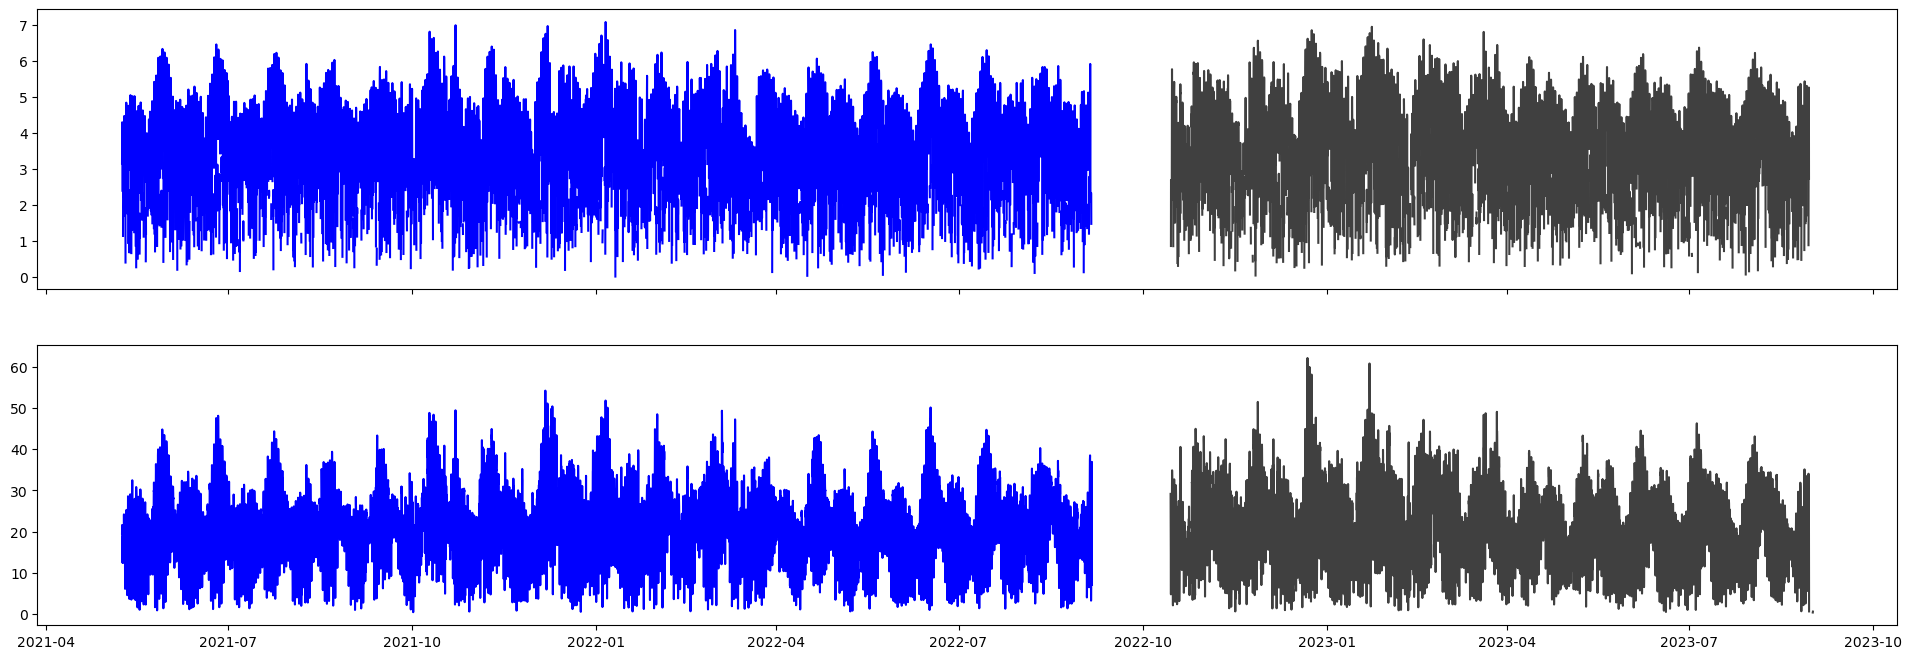

In [28]:
# choose bottom depth

fig, ax = plt.subplots(2,figsize=(24, 8),sharex=True)
ax[0].plot(adcp_01_data.time,
           np.sqrt(adcp_01_data.isel({'latitude':0,'longitude':0,'depth':-1}).v_comp_current),
           color='b',label='ADCP Speed')
ax[0].plot(adcp_02_data.time,
           np.sqrt(adcp_02_data.isel({'latitude':0,'longitude':0,'depth':-1}).v_comp_current),
           color='k',label='RCM Speed',alpha=0.75)
ax[1].plot(adcp_01_data.time,
           np.sqrt(adcp_01_data.isel({'latitude':0,'longitude':0,'depth':-1}).v_comp_current**2 + adcp_01_data.isel({'latitude':0,'longitude':0,'depth':-1}).u_comp_current**2),
           color='b',label='ADCP Speed')
ax[1].plot(adcp_02_data.time,
           np.sqrt(adcp_02_data.isel({'latitude':0,'longitude':0,'depth':-1}).v_comp_current**2 + adcp_02_data.isel({'latitude':0,'longitude':0,'depth':-1}).u_comp_current**2),
           color='k',label='RCM Speed',alpha=0.75)